# Práctica 4 de IA

## 1. Construcción de clasificadores en bases de datos sintéticas (1.5 puntos)

In [1]:
# Esta primera parte está adaptada de:
# http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs, make_moons, make_circles
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

%matplotlib inline

In [3]:
# data preparation
simple = make_blobs(n_samples=500, n_features=2,
                    centers=[[0,0], [2.5,2.5]],
                    random_state=1)
X,y = make_blobs(n_samples=500, n_features=2,
                 centers=[[0,0], [5,1]],
                 random_state=1)
X = X*np.matrix([[1,-2],[-20,10]])
linearly_separable=(X,y)

datasets = [simple,
            linearly_separable,
            make_moons(noise=0.1, random_state=0, n_samples=500),
            make_circles(noise=0.1, factor=0.5, random_state=1,
                         n_samples=500)
           ]

C:\Users\kecom\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


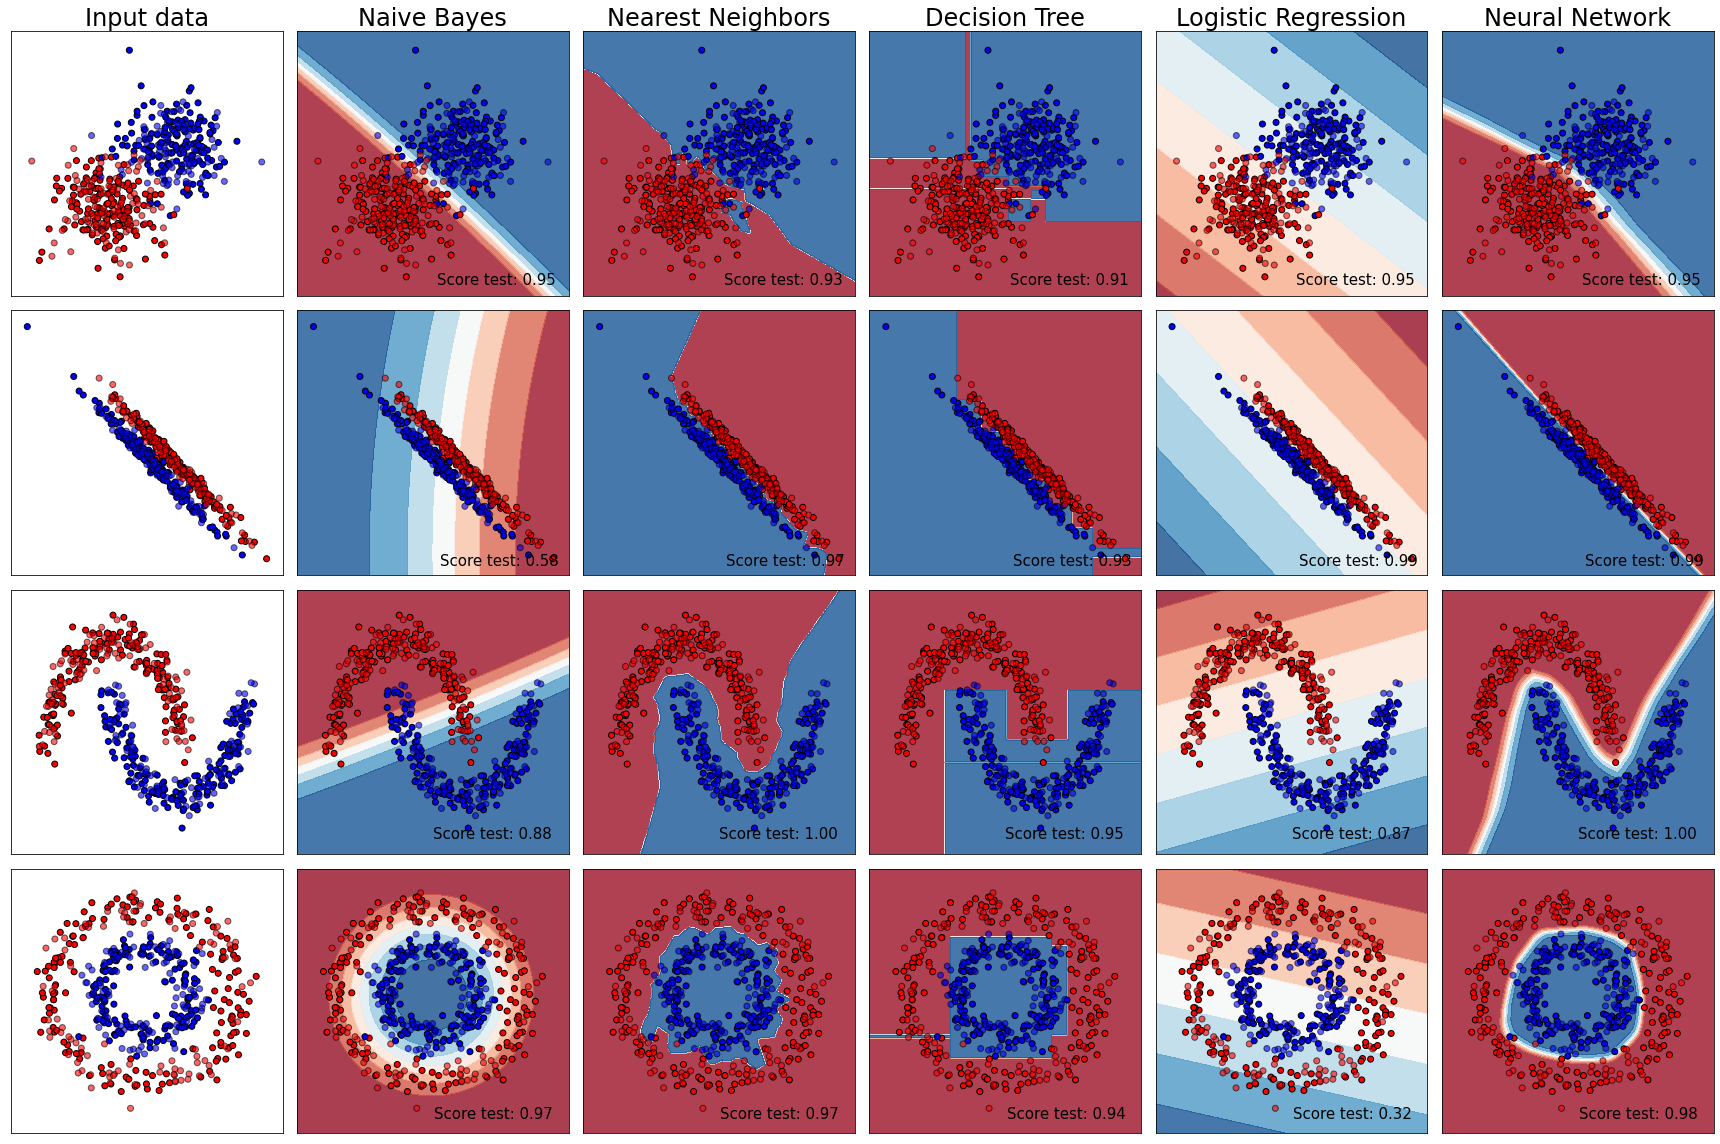

In [4]:
classifiers = [("Naive Bayes", GaussianNB()),
               ("Nearest Neighbors",
                KNeighborsClassifier(n_neighbors=1)), # número de vecinos
               ("Decision Tree",
                DecisionTreeClassifier(criterion='entropy',
                                       max_depth=1000)), # profundidad máxima del árbol
               ("Logistic Regression",
                LogisticRegression(C=100,solver='lbfgs')), # C: cuanto más alto menos regularización 
               ("Neural Network",
                MLPClassifier(hidden_layer_sizes=(50,10,20,),
                              max_iter=300,
                              alpha=0))]

from p4_IA_aux import plot_classifiers

plot_classifiers(classifiers, datasets)

In [5]:
# Listado de los parámetros de los diferentes clasificadores
for name, clf in classifiers:
    print(clf)

GaussianNB()
KNeighborsClassifier(n_neighbors=1)
DecisionTreeClassifier(criterion='entropy', max_depth=1000)
LogisticRegression(C=100)
MLPClassifier(alpha=0, hidden_layer_sizes=(50, 10, 20), max_iter=300)


**Prueba a cambiar los siguientes parámetros y observa las consecuencias en la frontera de clasificación construida:**

* Número de vecinos en k-nn. ¿Por qué siempre debe ser impar cuando hay dos clases?
* Profundidad máxima de los árboles de decisión.
* Número de neuronas en la red neuronal y máximo número de épocas de entrenamiento. **Nota:** (50,) indica una única capa oculta con 50 neuronas. (50,10,) indica dos capas ocultas con 50 y 10 neuronas respectivamente. (50,10,20,) indica tres capas ocultas con 50, 10 y 20 neuronas respectivamente, etc.

## 1 - KNN
When we use the algorithm with an even number of neighbors we can see that we may have a decent score, but some data would have problems, as it can be seen with the white "spaces". If the number is even and there is a node which has 2 neighbours, and those 2 neighbours have different classes, which class should be assigned?
An even number generates this kind of problems.

## 2 - Decision tree
The max depth of the decision tree is 2. It is set in the arguments.

For a very small depth the decision tree generates only 2 lines to separate classes.
The bigger the depth, the better the result, but if the depth is too big, the result is not always going to be better.

## 3 - Neural Network
If we decrement the epoch we get a warning because the number of epochs are not enough. With 600 or 700 it works well but these are still not enough, and if we put a number below the neural networks has a bad score.
10 neurons and 1000 epochs are not enogh for a good score. If we add a new layer with 10 neurons we can see that the score is better. A bigger number of layers implies a better score (at least until 3 layers), also less epochs are needed.
If we use the combination (50, 10, 20) (3 layers) we can see that with 500 epochs we do not have any warning, but even if we get a warning we can see that if we reduce the number of epochs until 100 we have a decent score.

__50, 10, 20__ give us always a score higher that __0.90__.